In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.ToTensor() #definindo a conversão de imagem para tensor
trainset = datasets.MNIST('.MNIST_data',download=True, transform=transform) # Carrega a parte de treino do dataset
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('.MNIST_data',download=True,train=False,transform=transform) # Carrega a parte de validação do dataset
valloader = torch.utils.data.DataLoader(valset,batch_size=64, shuffle=True) # cria um buffer para pegar os dados por partes

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.25MB/s]


torch.Size([1, 28, 28])
torch.Size([])


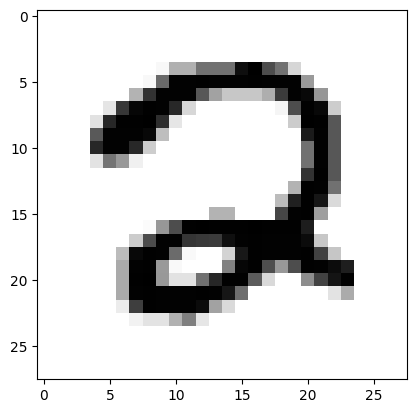

In [ ]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

print(imagens[0].shape) # para verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) # para verificar as dimensões do tensor de cada etiqueta

In [3]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28, 128)  # camada de entrada, 784 neuronios que se ligam a 128
        self.linear2 = nn.Linear(128, 64)     # camada interna 1, 128 neuronios que se ligam a 64
        self.linear3 = nn.Linear(64, 10)      # camada interna 2, 64 neuronios que se ligam a 10
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self,X):
        X = X.view(-1,28*28)
        X = self.relu(self.linear1(X))        # função de ativação da camada de entrada para camada interna 1
        X = self.relu(self.linear2(X))        # função de ativação da camada interna 1 para camada interna 2
        X = self.softmax(self.linear3(X))
        return X                              # dados utilizados para calcular a perda


In [4]:
def treino(model, trainloader, criterion, optimizer, epochs=10):
    inicio = time()
    steps = 0
    criterio = nn.NLLLoss()
    for e in range(epochs):
        running_loss = 0
        for imagens, etiquetas in trainloader:
            steps += 1
            optimizer.zero_grad()
            output = model.forward(imagens)
            loss = criterio(output, etiquetas)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()


In [5]:
def validacao(model, valloader, criterion):
    val_loss = 0
    accuracy = 0
    for images, labels in valloader:
        output = model(images)
        val_loss += criterion(output, labels)
        ps = torch.exp(output)
        equality = (labels.data == ps.max(1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    return val_loss, accuracy

    print("Device: ", device)




In [6]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)